In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
Moisture0cm = pd.read_csv('MoistureDataExcel0cm.csv')
Moisture0cm = Moisture0cm.drop(['Unnamed: 1', 'Unnamed: 3'], axis = 1)
Moist_T = Moisture0cm['TRUE'].dropna()
Moist_F = Moisture0cm['FALSE'].dropna()
Moist_R = Moisture0cm['Recorded'].dropna()


([<matplotlib.axis.XTick at 0x7f2eebe99278>,
 <a list of 3 Text xticklabel objects>)

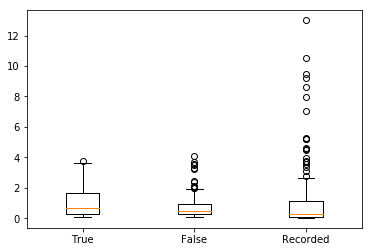

In [3]:

data = [Moist_T, Moist_F, Moist_R]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['True', 'False', 'Recorded'])

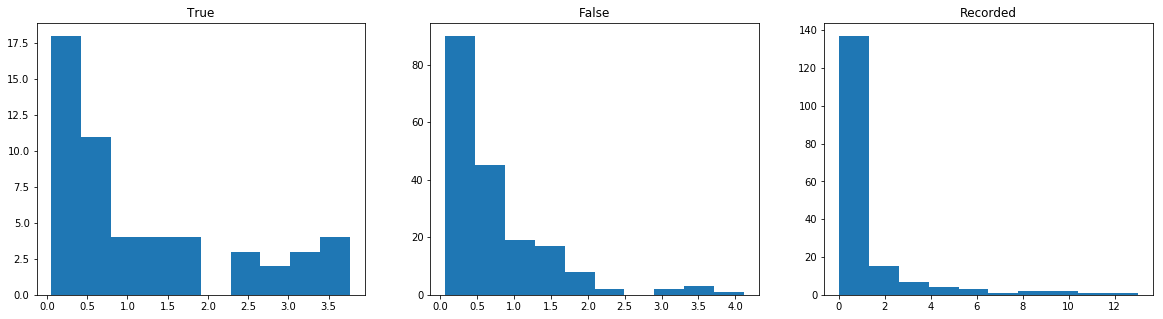

In [4]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('True')
plt.hist(Moist_T)

plt.subplot(1,3,2)
plt.title('False')
plt.hist(Moist_F)

plt.subplot(1,3,3)
plt.title('Recorded')
plt.hist(Moist_R)
# data = [Moist_T, Moist_F, Moist_R]
# fig7, ax7 = plt.subplots()
# ax7.set_title('Boxplots to see outliers for True, False, Recorded Data')
# plt.xticks([1,2,3], ['True','False', 'Recorded'])
# ax7.hist(data)

plt.show()

In [5]:
all_data = Moisture0cm.stack().reset_index(name='val')
print (all_data)

     level_0   level_1        val
0          0      TRUE   1.333689
1          0     FALSE   0.503124
2          0  Recorded  13.006400
3          1      TRUE   1.219175
4          1     FALSE   0.694842
5          1  Recorded  10.533600
6          2      TRUE   0.198802
7          2     FALSE   0.890309
8          2  Recorded   9.475770
9          3      TRUE   0.499722
10         3     FALSE   0.429658
11         3  Recorded   9.198690
12         4      TRUE   2.425603
13         4     FALSE   0.294113
14         4  Recorded   8.606520
15         5      TRUE   0.575006
16         5     FALSE   0.244446
17         5  Recorded   7.951950
18         6      TRUE   0.326317
19         6     FALSE   0.472298
20         6  Recorded   7.019500
21         7      TRUE   0.394301
22         7     FALSE   0.467454
23         7  Recorded   5.286780
24         8      TRUE   0.235066
25         8     FALSE   0.203089
26         8  Recorded   5.225050
27         9      TRUE   0.559464
28         9  

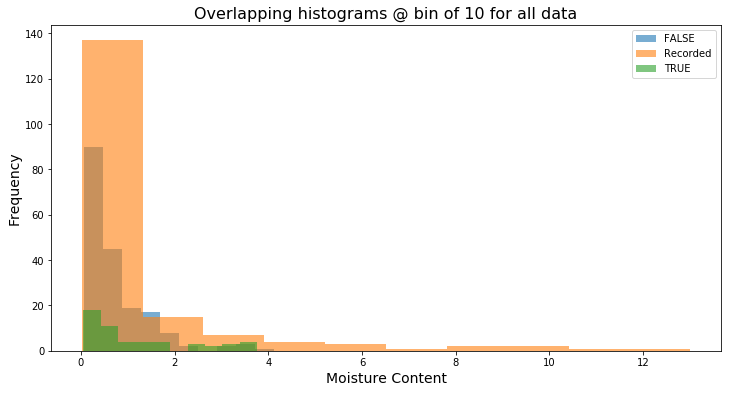

In [7]:
grouped= all_data.groupby('level_1')['val'] 
grouped.plot(kind='hist', bins=10, figsize=[12,6], alpha=.6, legend=True) 
plt.title('Overlapping histograms @ bin of 10 for all data', fontsize=16)
plt.xlabel('Moisture Content', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [8]:
import scipy.stats as stats
print(Moisture0cm.mean())

F, p = stats.f_oneway(Moist_T, Moist_F, Moist_R)

# The F statistic: one way Anova
print(F)
print(p)

TRUE        1.189909
FALSE       0.748394
Recorded    1.124960
dtype: float64
3.5638097239428066
0.029211678245945588


In [9]:
print('True vs False:', stats.ttest_ind(Moist_T, Moist_F))
print('True vs Recorded:', stats.ttest_ind(Moist_T, Moist_R))
print('False vs Recorded:', stats.ttest_ind(Moist_F, Moist_R))

True vs False: Ttest_indResult(statistic=3.397016245619252, pvalue=0.0007983212854216843)
True vs Recorded: Ttest_indResult(statistic=0.21693367081233825, pvalue=0.8284574879369813)
False vs Recorded: Ttest_indResult(statistic=-2.3218926859117177, pvalue=0.02079923866984413)


## Based on the t-tests, the values of True and Recorded data are not statistically significant whereas the values of True vs False are and False vs Recorded are also statistically different. This is not adjusted for a weighted sample